# Die Plotversuche

In [2]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import requests, zipfile, io #zum abspeichern von PDFs
from tqdm import tqdm # Anzeigen des aktuellen Ladestandes
import PyPDF2
import re
from os import listdir
from os.path import isfile, join
import locale
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.3


In [3]:
df=pd.read_csv("KRFrames/df_tuti_Ganzes_Frame")

In [4]:
df1= df[["VorlageNR", "Namenganz", "Einreichedatum"]]

In [5]:
df2=df1.set_index(pd.DatetimeIndex(df1["Einreichedatum"]).date)
df2

,VorlageNR,Namenganz,Einreichedatum
2019-11-26,3031,SVP-Fraktion,2019-11-26
2019-11-26,3030,SVP-Fraktion,2019-11-26
2019-11-24,3029,Alternative,2019-11-24
2019-11-15,3026,Thomas Gander,2019-11-15
2019-11-15,3026,Markus Spörri,2019-11-15
...,...,...,...
2005-04-26,857,Karl Betschart,2005-04-26
2002-12-03,836,Käty Hofer Buser,2002-12-03
2002-08-13,810,Marcel Meyer,2002-08-13
2006-08-22,801,Hans Abicht,2006-08-22


In [6]:
df33=df2.drop_duplicates()

In [8]:
df3=df33.sort_index(ascending=False).head(1102)

In [9]:
df3.index= pd.to_datetime(df3.index) #nun den Index in datetime umwalndeln

In [27]:
df5=df3

# Ergebnisse
nun scheint es endlich zu stimmen. Mal schauen wie es aussieht.

In [28]:
df5["Geschäft"].resample("M").count()

1982-12-31    1
1983-01-31    0
1983-02-28    0
1983-03-31    0
1983-04-30    0
             ..
2019-07-31    6
2019-08-31    3
2019-09-30    7
2019-10-31    6
2019-11-30    5
Freq: M, Name: Geschäft, Length: 444, dtype: int64

# Hier das Ergebnis
Zahlen 2009 weisen (Wahljahre 2010/2011) nicht auf eine solche Veränderung hin. Die Zahlen für die Wahljahre 14/15 und 18/19 hingegen schon.
HMMM oder doch nicht - das Resutat scheint nicht so klar

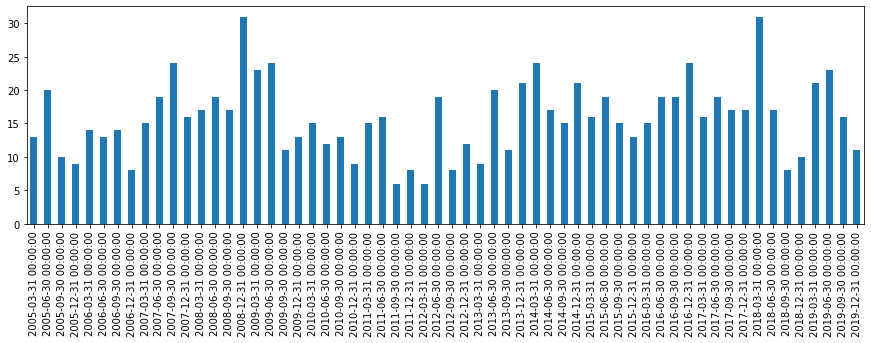

In [29]:

df5["Geschäft"].resample("Q").count()["2005":].plot(figsize=(15,4), kind="bar")

In [32]:
df5["Geschäft"].resample("A").count()["2005":]

2005-12-31    52
2006-12-31    49
2007-12-31    74
2008-12-31    84
2009-12-31    71
2010-12-31    49
2011-12-31    45
2012-12-31    45
2013-12-31    61
2014-12-31    77
2015-12-31    63
2016-12-31    77
2017-12-31    69
2018-12-31    66
2019-12-31    71
Freq: A-DEC, Name: Geschäft, dtype: int64

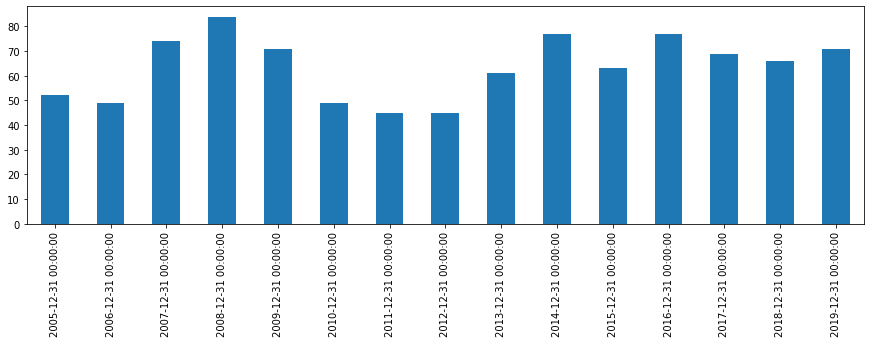

In [30]:
# so sieht der Verlauf über die Jahre hinweg aus. 2011 ein Tief und seither wieder eher konstant.
# Wobei das aktuelle Jahr ja eigentlich noch nicht zu Ende ist, und die Daten von Oktober sind. 
# 2014 war ein Spitzenjahr. 
df5["Geschäft"].resample("A").count()["2005":].plot(figsize=(15,4), kind="bar")

df5["Geschäft"].resample("Y").count()["2005":].plot(figsize=(15,4))

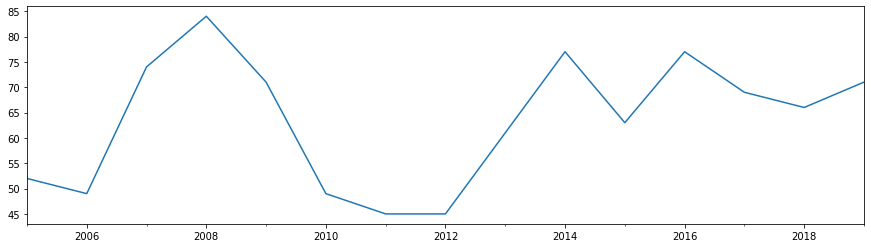

In [31]:
df5["Geschäft"].resample("A").count()["2005":].plot(figsize=(15,4))

In [ ]:
# Sehr gut... so siehts realistisch aus. 
# Kontrolle ergibt ebenfall ähnliche Zahlen. Abgesehen von 2011 - von dort gibt es viele Datenmigrations-Files. 
# Diese werden bei der Page des Kantons nicht aufgeführt. die restlichen Zahlen stimmem ,mit der Grafik überein.
# Nun noch die Skala so einstellen, dass sie von 0 ausgeht. Sonst wird es verwirrend. 